In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews/subwords8k', as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBU8UPT/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBU8UPT/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBU8UPT/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset, test_dataset = imdb['train'], imdb['test']

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [3]:
tokenizer = info.features['text'].encoder

### Simple Neural Network

In [4]:
import tensorflow as tf

embedding_dim = 64

model = tf.keras.Sequential([
            tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(6, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [5]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 15s 39ms/step - loss: 0.6822 - accuracy: 0.5916 - val_loss: 0.6456 - val_accuracy: 0.7409
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 0.5337 - accuracy: 0.7994 - val_loss: 0.4541 - val_accuracy: 0.8099
Epoch 3/10
391/391 [==============================] - 15s 38ms/step - loss: 0.3688 - accuracy: 0.8719 - val_loss: 0.3603 - val_accuracy: 0.8619
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 0.2965 - accuracy: 0.8938 - val_loss: 0.3276 - val_accuracy: 0.8738
Epoch 5/10
391/391 [==============================] - 15s 38ms/step - loss: 0.2575 - accuracy: 0.9065 - val_loss: 0.3328 - val_accuracy: 0.8616
Epoch 6/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2330 - accuracy: 0.9168 - val_loss: 0.3072 - val_accuracy: 0.8787
Epoch 7/10
391/391 [==============================] - 15s 38ms/step - loss: 0.2138 - accuracy: 0.9228 - val_loss: 0.3069 - val_accuracy:

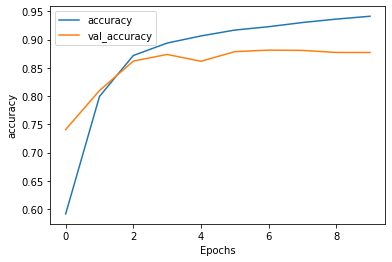

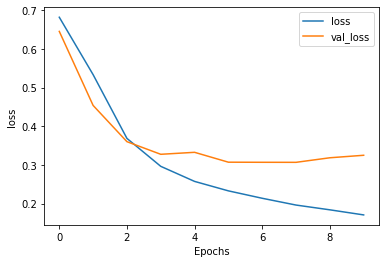

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Single Layer LSTM

In [7]:
embedding_dim = 64

model = tf.keras.Sequential([
            tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 163s 416ms/step - loss: 0.5282 - accuracy: 0.7306 - val_loss: 0.4478 - val_accuracy: 0.8101
Epoch 2/10
391/391 [==============================] - 162s 415ms/step - loss: 0.3665 - accuracy: 0.8500 - val_loss: 0.4688 - val_accuracy: 0.8277
Epoch 3/10
391/391 [==============================] - 162s 414ms/step - loss: 0.2952 - accuracy: 0.8866 - val_loss: 0.4010 - val_accuracy: 0.8440
Epoch 4/10
391/391 [==============================] - 162s 414ms/step - loss: 0.2796 - accuracy: 0.8860 - val_loss: 0.7013 - val_accuracy: 0.5000
Epoch 5/10
391/391 [==============================] - 160s 409ms/step - loss: 0.6873 - accuracy: 0.5511 - val_loss: 0.6864 - val_accuracy: 0.5483
Epoch 6/10
391/391 [==============================] - 162s 414ms/step - loss: 0.6577 - accuracy: 0.6025 - val_loss: 0.6426 - val_accuracy: 0.6473
Epoch 7/10
391/391 [==============================] - 161s 411ms/step - loss: 0.5399 - accuracy: 0.7303 - val_loss: 0.5546 -

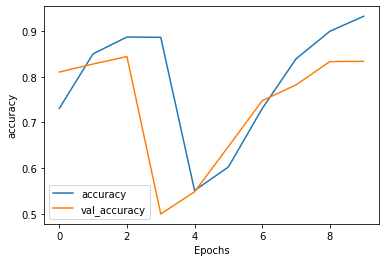

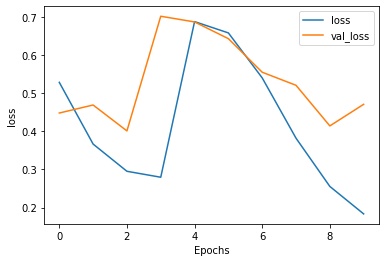

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Multi Layer LSTM

In [10]:
embedding_dim = 64

model = tf.keras.Sequential([
            tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [11]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 310s 793ms/step - loss: 0.5677 - accuracy: 0.7046 - val_loss: 0.4573 - val_accuracy: 0.7917
Epoch 2/10
391/391 [==============================] - 313s 801ms/step - loss: 0.4594 - accuracy: 0.7904 - val_loss: 0.4640 - val_accuracy: 0.7927
Epoch 3/10
391/391 [==============================] - 311s 796ms/step - loss: 0.4403 - accuracy: 0.7988 - val_loss: 0.4885 - val_accuracy: 0.7891
Epoch 4/10
391/391 [==============================] - 314s 802ms/step - loss: 0.4115 - accuracy: 0.8231 - val_loss: 0.5017 - val_accuracy: 0.7683
Epoch 5/10
391/391 [==============================] - 311s 795ms/step - loss: 0.3324 - accuracy: 0.8666 - val_loss: 0.3926 - val_accuracy: 0.8456
Epoch 6/10
391/391 [==============================] - 313s 802ms/step - loss: 0.2627 - accuracy: 0.8986 - val_loss: 0.3516 - val_accuracy: 0.8522
Epoch 7/10
391/391 [==============================] - 311s 795ms/step - loss: 0.1981 - accuracy: 0.9280 - val_loss: 0.3365 -

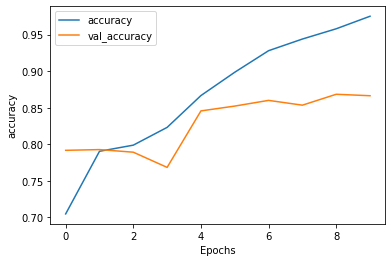

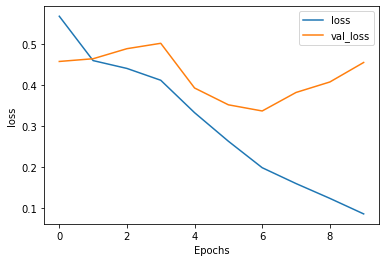

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### ConV

In [13]:
embedding_dim = 64

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 47s 121ms/step - loss: 0.4496 - accuracy: 0.7840 - val_loss: 0.3090 - val_accuracy: 0.8764
Epoch 2/10
391/391 [==============================] - 28s 71ms/step - loss: 0.2220 - accuracy: 0.9159 - val_loss: 0.3086 - val_accuracy: 0.8765
Epoch 3/10
391/391 [==============================] - 25s 64ms/step - loss: 0.1708 - accuracy: 0.9384 - val_loss: 0.3295 - val_accuracy: 0.8757
Epoch 4/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1377 - accuracy: 0.9516 - val_loss: 0.3681 - val_accuracy: 0.8668
Epoch 5/10
391/391 [==============================] - 24s 62ms/step - loss: 0.1131 - accuracy: 0.9617 - val_loss: 0.4068 - val_accuracy: 0.8648
Epoch 6/10
391/391 [==============================] - 24s 61ms/step - loss: 0.0894 - accuracy: 0.9708 - val_loss: 0.5083 - val_accuracy: 0.8621
Epoch 7/10
391/391 [==============================] - 23s 60ms/step - loss: 0.0742 - accuracy: 0.9764 - val_loss: 0.5281 - val_accuracy

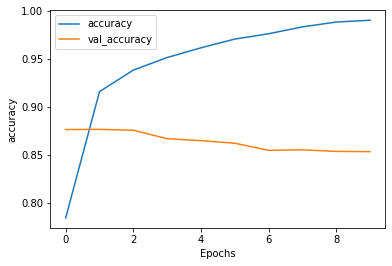

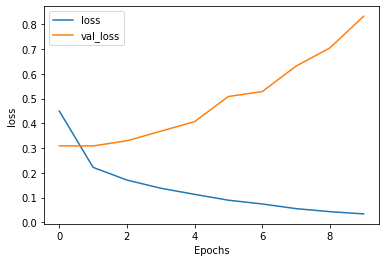

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Single Layer GRU

In [16]:
embedding_dim = 64

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 546,881
Trainable params: 546,881
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 199s 508ms/step - loss: 0.5437 - accuracy: 0.7097 - val_loss: 0.4315 - val_accuracy: 0.8141
Epoch 2/10
391/391 [==============================] - 197s 505ms/step - loss: 0.3466 - accuracy: 0.8580 - val_loss: 0.3866 - val_accuracy: 0.8377
Epoch 3/10
391/391 [==============================] - 190s 485ms/step - loss: 0.2578 - accuracy: 0.9016 - val_loss: 0.3743 - val_accuracy: 0.8485
Epoch 4/10
391/391 [==============================] - 195s 500ms/step - loss: 0.1962 - accuracy: 0.9281 - val_loss: 0.3817 - val_accuracy: 0.8539
Epoch 5/10
391/391 [==============================] - 197s 503ms/step - loss: 0.1484 - accuracy: 0.9476 - val_loss: 0.4321 - val_accuracy: 0.8482
Epoch 6/10
391/391 [==============================] - 194s 496ms/step - loss: 0.1076 - accuracy: 0.9637 - val_loss: 0.5128 - val_accuracy: 0.8334
Epoch 7/10
391/391 [==============================] - 201s 515ms/step - loss: 0.0910 - accuracy: 0.9688 - val_loss: 0.5118 -

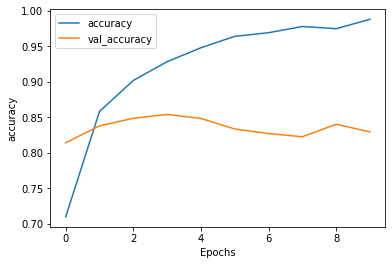

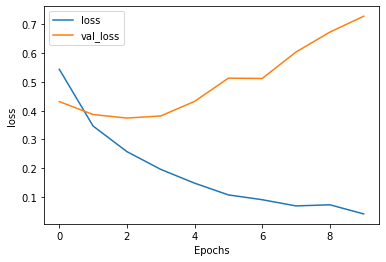

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### LSTM, dropouts and conv

In [19]:
embedding_dim = 64

model = tf.keras.Sequential([
              tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Conv1D(64, 5, activation='relu'),
              tf.keras.layers.MaxPooling1D(pool_size=4),
              tf.keras.layers.LSTM(64),
              tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 577,473
Trainable params: 577,473
Non-trainable params: 0
________________________________________________

In [20]:
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 61s 155ms/step - loss: 0.6933 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 46s 117ms/step - loss: 0.6928 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 3/10
391/391 [==============================] - 44s 112ms/step - loss: 0.6894 - accuracy: 0.5039 - val_loss: 0.6951 - val_accuracy: 0.5024
Epoch 4/10
391/391 [==============================] - 43s 110ms/step - loss: 0.6878 - accuracy: 0.5026 - val_loss: 0.7066 - val_accuracy: 0.5046
Epoch 5/10
391/391 [==============================] - 44s 112ms/step - loss: 0.6840 - accuracy: 0.5191 - val_loss: 0.6924 - val_accuracy: 0.5056
Epoch 6/10
391/391 [==============================] - 43s 109ms/step - loss: 0.6844 - accuracy: 0.5091 - val_loss: 0.6925 - val_accuracy: 0.5034
Epoch 7/10
391/391 [==============================] - 42s 108ms/step - loss: 0.6599 - accuracy: 0.5716 - val_loss: 0.6229 - val_ac

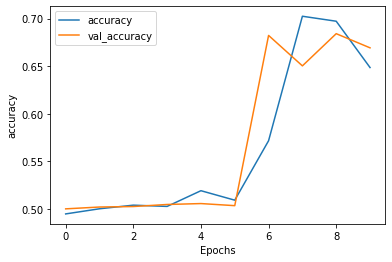

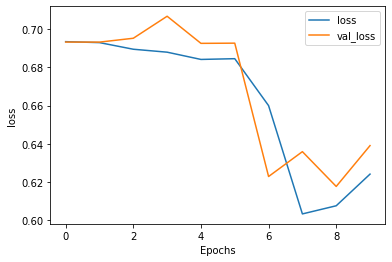

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")